In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [6]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

**Balanced problem

In [7]:
data.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [8]:
data.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

In [9]:
pd.crosstab(data.target, data.exang)

exang,0,1
target,,
0,62,76
1,142,23


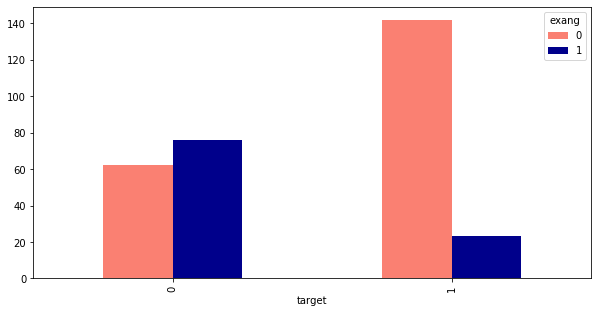

In [10]:
pd.crosstab(data.target, data.exang).plot(kind='bar',
                                          figsize=(10,5),
                                          color=["salmon", "darkblue"])

In [11]:
pd.crosstab(data.target, data.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


Text(0, 0.5, 'CP')

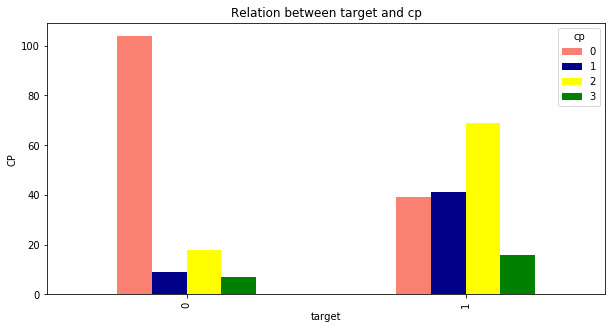

In [12]:
pd.crosstab(data.target, data.cp).plot(kind='bar',
                                       figsize=(10,5),
                                      color=['salmon','darkblue','yellow','green'])
plt.title('Relation between target and cp')
plt.ylabel('CP')

## Age vs Max Heart Rate 

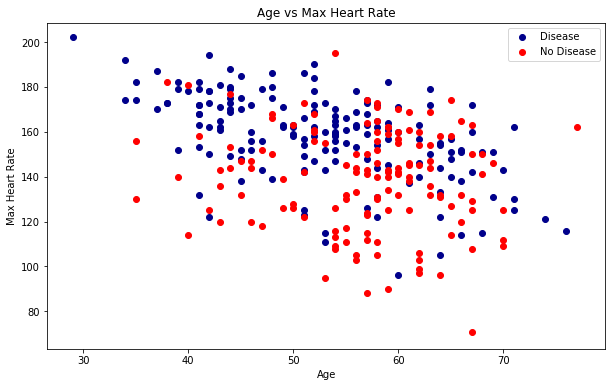

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c='darkblue')

plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c='red')

plt.title('Age vs Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

# Modelling

In [14]:
X = data.drop('target', axis=1)
y = data.target

In [15]:
np.random.seed(7)
X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size=0.2)

1 logistic regression
2 k nearest neighbor
3 random forest

## put models in dictionary

In [16]:
models = {'Logistic Regression':LogisticRegression(),
          'KNN':KNeighborsClassifier(),
          'Random Forest':RandomForestClassifier()}

# create fun for fiiting and score

def fit_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(7)
    model_scores= {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]= model.score(X_test,y_test)
    return model_scores

In [17]:
model_scores = fit_score(models=models,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)

C:\Users\Predator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Predator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
model_scores

{'Logistic Regression': 0.7377049180327869,
 'KNN': 0.5573770491803278,
 'Random Forest': 0.7377049180327869}

## Tuning the hyperparameter

In [19]:
train_scores = []
test_scores = []

# KNN Tuning

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Maximum KNN Score on test data : 67.21


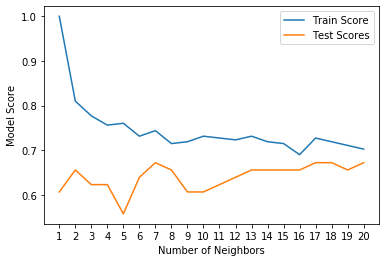

In [20]:
import numpy as np
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Scores')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN Score on test data : {max(test_scores)*100:.2f}')

## hyperparameter tuning with randomized seacrh cv

In [21]:
gridlr = { 'C':np.logspace(-4, 4, 30),
           'solver': ['liblinear']}


gridrfc = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 7, 9],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

Tuning models now

# LR model tining

In [22]:
np.random.seed(7)

rs_gridlr = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=gridlr,
                               cv=5,
                               n_iter=30,
                               verbose=True)

# fit model for lr


rs_gridlr.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
C:\Users\Predator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=30, n_jobs=None,
                   param_distributi...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+0

In [23]:
rs_gridlr.best_params_

{'solver': 'liblinear', 'C': 0.38566204211634725}

In [24]:
rs_gridlr.score(X_test, y_test)

0.7540983606557377

Tuning randomforest now

In [25]:
np.random.seed(7)


rs_rf =  RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=gridrfc,
                            cv=5,
                            n_iter=30,
                            verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   41.0s finished
C:\Users\Predator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [26]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 9}

In [27]:
rs_rf.score(X_test,y_test)

0.7213114754098361

## Using GridSreachCV
* only considering the LR model

In [28]:
gs = GridSearchCV(LogisticRegression(),
                         param_grid=gridlr,
                         cv=5,
                         verbose=True)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
C:\Users\Predator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [29]:
gs.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [30]:
gs.score(X_test,y_test)

0.7540983606557377

## Evaluating our ML classifier

* roc curve and auc score
* confusion matrix
* precison 
* recall
* F1 score

In [31]:
ypreds = gs.predict(X_test)
ypreds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [33]:
print(confusion_matrix(y_test,ypreds))

[[18 12]
 [ 3 28]]


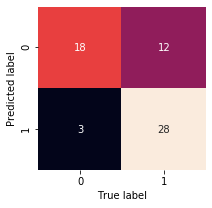

In [38]:

def plotconfusionmat(y_test,ypreds):
    fig, ax=plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,ypreds),
                     annot=True,
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
    bottom , top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    

    
plotconfusionmat(y_test,ypreds)

## CLASSIFICATION REPORT AND CROSS VALIDATED PRECISION RECALL F1 SCORE

In [39]:
print(classification_report(y_test,ypreds))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



# make classification report on cross validated data

In [40]:
# check best hyperparameters 

gs.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [41]:
clf = LogisticRegression(C=0.38566204211634725,
                         solver='liblinear')

In [43]:
# cross validated accuracy
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc.mean()

0.8380874316939891

In [44]:
# precision CV
cv_pre = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision')
cv_pre.mean()

0.8154667272314331

In [45]:
# recall CV
cv_rc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall')
cv_rc.mean()

0.9151515151515153

In [47]:
# F1 CV
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='f1')
cv_f1.mean()

0.8614850462777628

## Feature Importance

In [51]:
clf = LogisticRegression(C=0.38566204211634725,
                         solver='liblinear')
clf.fit(X_train,y_train)


LogisticRegression(C=0.38566204211634725, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
clf.coef_

array([[ 0.02197327, -1.18335587,  0.75710264, -0.02334148, -0.0017493 ,
         0.35581907,  0.35391416,  0.03440635, -0.70025878, -0.56110326,
         0.46102557, -0.61500843, -1.02087035]])

In [53]:
# matching coeff to colums

feature = dict(zip(data.columns, list(clf.coef_[0])))
feature

{'age': 0.02197327203299422,
 'sex': -1.1833558736250682,
 'cp': 0.7571026420043102,
 'trestbps': -0.023341481695477156,
 'chol': -0.0017493007024095215,
 'fbs': 0.3558190656304481,
 'restecg': 0.3539141559833727,
 'thalach': 0.034406352895150726,
 'exang': -0.7002587804075295,
 'oldpeak': -0.5611032605259144,
 'slope': 0.461025570397942,
 'ca': -0.6150084337409798,
 'thal': -1.0208703521483862}

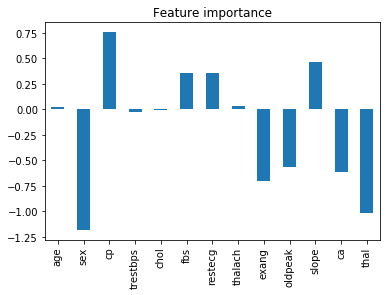

In [54]:
# visualize feature importance 
featuredf=pd.DataFrame(feature, index=[0])
featuredf.T.plot.bar(title='Feature importance', legend=False)